In [22]:
#Importing the necessary modules and owid-covid-data.csv

import pandas as pd
import numpy as np
import seaborn as sns

covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.shape

(62590, 50)

This covid data set contains the 50 columns and 59759 rows. As there are many columns, we create a dataframe having the necessary columns and to ease the retrieval of the data, add index column to it.

In [75]:
analyse_data_cardio = pd.DataFrame(covid_data[['iso_code', 'continent', 'location','date', 'total_cases', 
                                               'total_deaths', 'cardiovasc_death_rate', 'female_smokers', 
                                               'male_smokers', 'diabetes_prevalence','new_deaths_per_million','gdp_per_capita']])

analyse_data_cardio['index'] = pd.Series(range(0,59758))
analyse_data_cardio.head()
#covid_data.columns

,iso_code,continent,location,date,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,new_deaths_per_million,gdp_per_capita,index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,NaN,597.029,NaN,NaN,9.59,0.0,1803.987,0.0
1,AFG,Asia,Afghanistan,2020-01-24,NaN,NaN,597.029,NaN,NaN,9.59,0.0,1803.987,1.0
2,AFG,Asia,Afghanistan,2020-01-25,NaN,NaN,597.029,NaN,NaN,9.59,0.0,1803.987,2.0
3,AFG,Asia,Afghanistan,2020-01-26,NaN,NaN,597.029,NaN,NaN,9.59,0.0,1803.987,3.0
4,AFG,Asia,Afghanistan,2020-01-27,NaN,NaN,597.029,NaN,NaN,9.59,0.0,1803.987,4.0


In [76]:
analyse_data_cardio.tail()

,iso_code,continent,location,date,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,new_deaths_per_million,gdp_per_capita,index
62585,ZWE,Africa,Zimbabwe,2020-12-10,11081.0,305.0,307.846,1.6,30.7,1.82,0.067,1899.775,NaN
62586,ZWE,Africa,Zimbabwe,2020-12-11,11162.0,306.0,307.846,1.6,30.7,1.82,0.067,1899.775,NaN
62587,ZWE,Africa,Zimbabwe,2020-12-12,11219.0,307.0,307.846,1.6,30.7,1.82,0.067,1899.775,NaN
62588,ZWE,Africa,Zimbabwe,2020-12-13,11246.0,307.0,307.846,1.6,30.7,1.82,0.000,1899.775,NaN
62589,ZWE,Africa,Zimbabwe,2020-12-14,11358.0,309.0,307.846,1.6,30.7,1.82,0.135,1899.775,NaN


From the data above, it is observed that there are many null values present. For the columns, total_cases, total_deaths, cardiovasc_death_rate null values can be converted into 0.

In [77]:
analyse_data_cardio.describe()

,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,new_deaths_per_million,gdp_per_capita,index
count,5.361500e+04,4.561700e+04,60223.000000,46809.000000,46155.000000,60948.000000,62131.000000,59640.000000,59758.00000
mean,2.348286e+05,8.502609e+03,262.440663,10.398516,32.685804,7.899278,0.757332,18359.628910,29878.50000
std,2.274804e+06,6.671221e+04,120.484426,10.367791,13.519320,4.195268,3.028584,19391.297382,17250.79303
min,1.000000e+00,1.000000e+00,79.370000,0.100000,7.700000,0.990000,-76.445000,661.240000,0.00000
25%,3.950000e+02,2.200000e+01,170.050000,1.900000,21.600000,5.290000,0.000000,3823.194000,14939.25000
50%,3.980000e+03,1.270000e+02,243.964000,6.200000,31.400000,7.110000,0.000000,11840.846000,29878.50000
75%,3.914900e+04,1.098000e+03,331.430000,19.100000,41.100000,10.080000,0.333000,26382.287000,44817.75000
max,7.284868e+07,1.621154e+06,724.417000,44.000000,78.100000,30.530000,218.329000,116935.600000,59757.00000


In [78]:
#To see the number of null values
print(analyse_data_cardio.isnull().sum())
#index = analyse_data_cardio[ analyse_data_cardio['total_cases'].isnull().values == True ].index

#print(analyse_data_cardio[analyse_data_cardio['continent'].isnull() == True])
#for i in index:
#   print(analyse_data_cardio[analyse_data_cardio['index'] == i])

iso_code                    327
continent                   655
location                      0
date                          0
total_cases                8975
total_deaths              16973
cardiovasc_death_rate      2367
female_smokers            15781
male_smokers              16435
diabetes_prevalence        1642
new_deaths_per_million      459
gdp_per_capita             2950
index                      2832
dtype: int64


There are null values present in all the columns except the location and date. The columns iso_code and continent with null values can be removed because the must be a location that must fall into some continent and which cannot be null.

In [79]:
index = analyse_data_cardio[ analyse_data_cardio['iso_code'].isnull().values == True ].index
analyse_data_cardio.drop(index, inplace=True)
analyse_data_cardio.shape

(62263, 13)

In [80]:
#As the name of the continent is null, but the location and iso_code are not null, the value for the column 'continent'
#can be replaced with the location.
df = analyse_data_cardio[analyse_data_cardio['continent'].isnull()]
index = analyse_data_cardio[ analyse_data_cardio['continent'].isnull().values == True ].index
#print(df.location)

#boolean_condition = analyse_data_cardio['continent'].isnull()
#column_name = "continent"
#new_value = analyse_data_cardio[index[0]].location

#df.loc[boolean_condition, column_name] = new_value


#analyse_data_cardio.loc(analyse_data_cardio.continent.isnull(), 'continent')

In [81]:
#The null values in the columns total_cases, total_deaths, cardiovasc_death_rate are replaced with
#0 because there may be no cases or deaths.
analyse_data_cardio['total_cases'] = analyse_data_cardio['total_cases'].replace(np.nan, 0)
analyse_data_cardio['total_deaths'] = analyse_data_cardio['total_deaths'].replace(np.nan, 0)
analyse_data_cardio['cardiovasc_death_rate'] = analyse_data_cardio['cardiovasc_death_rate'].replace(np.nan, 0)
analyse_data_cardio['new_deaths_per_million'] = analyse_data_cardio['new_deaths_per_million'].replace(np.nan, 0)
analyse_data_cardio['gdp_per_capita'] = analyse_data_cardio['gdp_per_capita'].replace(np.nan, 0)
print(analyse_data_cardio.isnull().sum())

iso_code                      0
continent                   328
location                      0
date                          0
total_cases                   0
total_deaths                  0
cardiovasc_death_rate         0
female_smokers            15454
male_smokers              16108
diabetes_prevalence        1315
new_deaths_per_million        0
gdp_per_capita                0
index                      2832
dtype: int64


In [82]:
#The null values in the columns female_smokers, male_smokers, diabets_prevalence are replaced with the 
#mean values for that particular column.
analyse_data_cardio['female_smokers'] = analyse_data_cardio['female_smokers'].replace(np.nan, analyse_data_cardio['female_smokers'].mean())
analyse_data_cardio['male_smokers'] = analyse_data_cardio['male_smokers'].replace(np.nan, analyse_data_cardio['male_smokers'].mean())
analyse_data_cardio['diabetes_prevalence'] = analyse_data_cardio['diabetes_prevalence'].replace(np.nan, analyse_data_cardio['diabetes_prevalence'].mean())
print(analyse_data_cardio.isnull().sum())

iso_code                     0
continent                  328
location                     0
date                         0
total_cases                  0
total_deaths                 0
cardiovasc_death_rate        0
female_smokers               0
male_smokers                 0
diabetes_prevalence          0
new_deaths_per_million       0
gdp_per_capita               0
index                     2832
dtype: int64


In [83]:
analyse_data_cardio.info()
#The data reports on various scenarios like total_cases, total_deaths, diabetes_prevalence during COVID. From the info, 
#we can get that the columns 'iso_code', 'continent', 'location', 'date' are of object type. 
#And the following are the categorical values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62263 entries, 0 to 62589
Data columns (total 13 columns):
iso_code                  62263 non-null object
continent                 61935 non-null object
location                  62263 non-null object
date                      62263 non-null object
total_cases               62263 non-null float64
total_deaths              62263 non-null float64
cardiovasc_death_rate     62263 non-null float64
female_smokers            62263 non-null float64
male_smokers              62263 non-null float64
diabetes_prevalence       62263 non-null float64
new_deaths_per_million    62263 non-null float64
gdp_per_capita            62263 non-null float64
index                     59431 non-null float64
dtypes: float64(9), object(4)
memory usage: 6.7+ MB


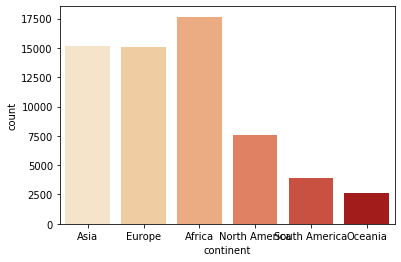

In [84]:
#From the count plot, we can see that COVID has affected more in Europe.
sns.countplot(x='continent',data=analyse_data_cardio, palette="OrRd")

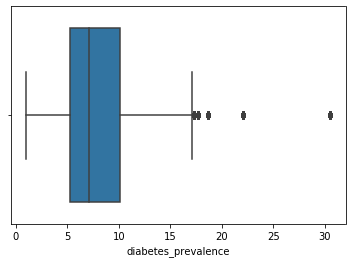

In [85]:
sns.boxplot(analyse_data_cardio['diabetes_prevalence'])

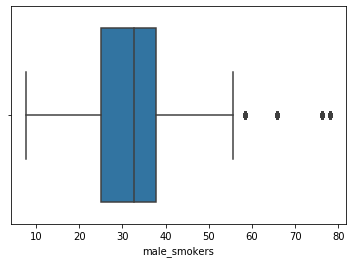

In [86]:
sns.boxplot(analyse_data_cardio['male_smokers'])

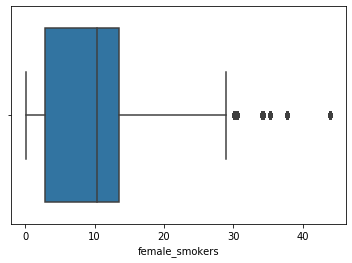

In [87]:
sns.boxplot(analyse_data_cardio['female_smokers'])

There are outliers in the columns 'male_smokers', 'female_smokers', 'diabetes_prevalence'. Nothing is to modify for now.

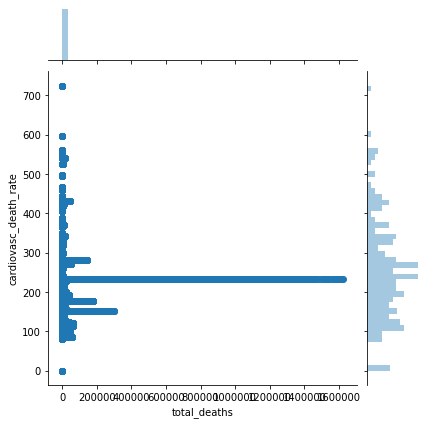

In [88]:
sns.jointplot(x="total_deaths", y="cardiovasc_death_rate", data=analyse_data_cardio,kind="scatter")
#sns.catplot(x="total_deaths",y="cardiovasc_death_rate",data=analyse_data_cardio,hue="continent")

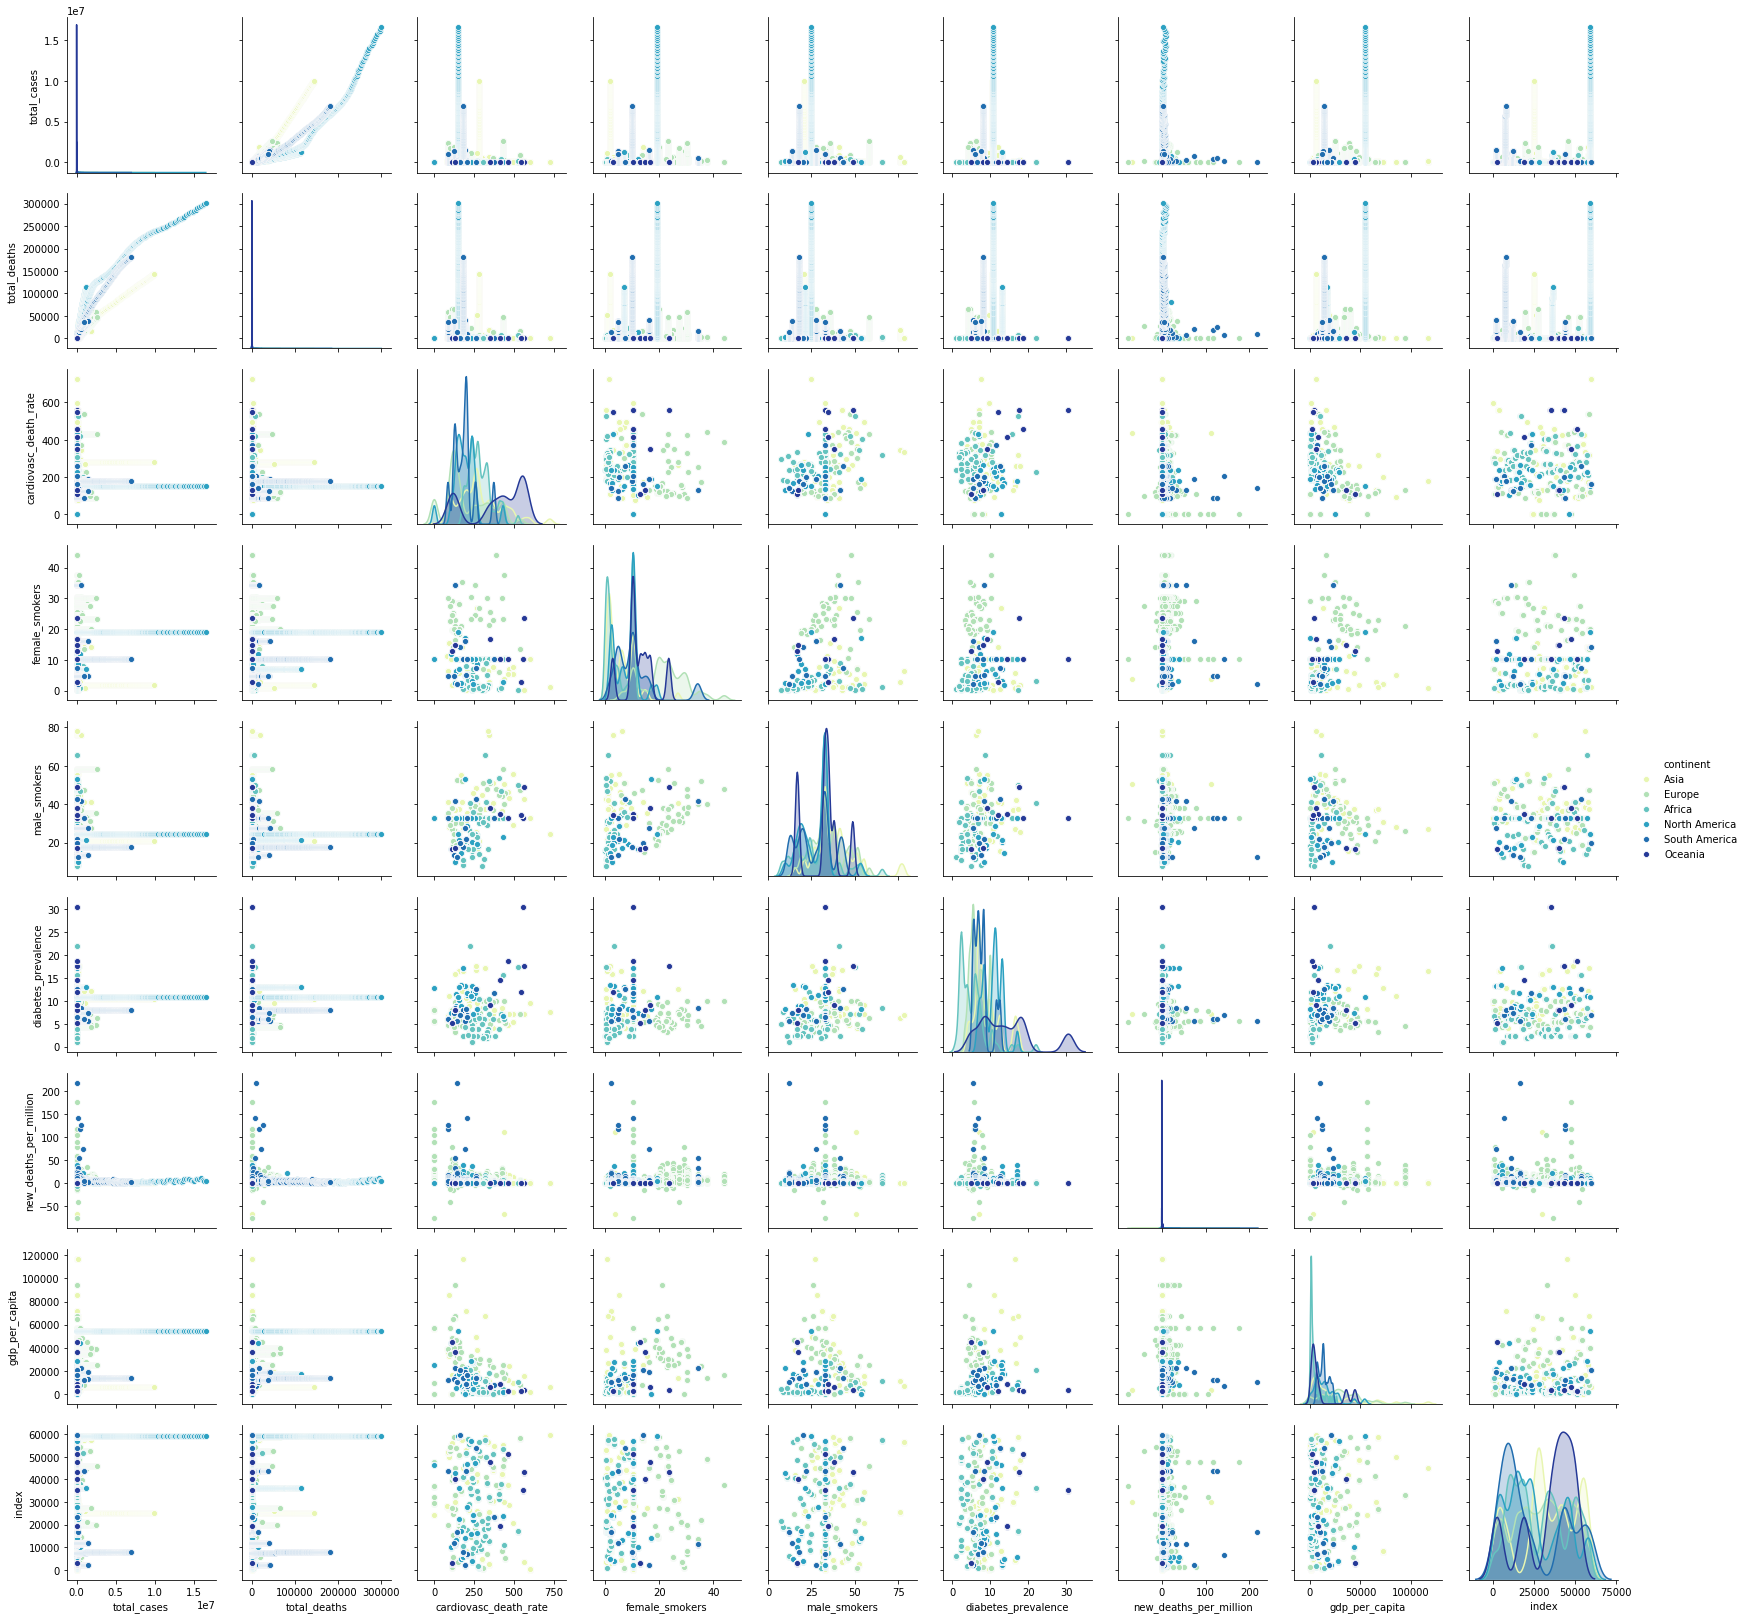

In [92]:
sns.pairplot(analyse_data_cardio,hue="continent",palette="YlGnBu")
#From the below graph, we can consider that
# The 'total_cases' have a linear relationship with the 'total_deaths'.
# The 'cardiovasc_death_rate' has no relation with the 'total_cases'. With the increase in the total_cases, 
# there is not much increase in the 'cardiovasc_death_rate' has the scatter points lie in between 0-0.2.
# The same is the case with 'smokers' and 'diabetes'. There is no relation between the columns and the total_cases.

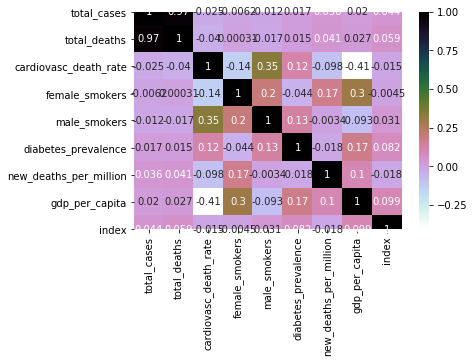

In [90]:
sns.heatmap(analyse_data_cardio.corr(),annot=True,cmap='cubehelix_r')
# From the graph below, we can see that the columns 'total_cases' and 'total_deaths' has the good correlation. 
# The columns 'cardiovasc_death_rate', 'female_smokers', 'male_smokers', 'diabetes_prevalence' has the good correlation.

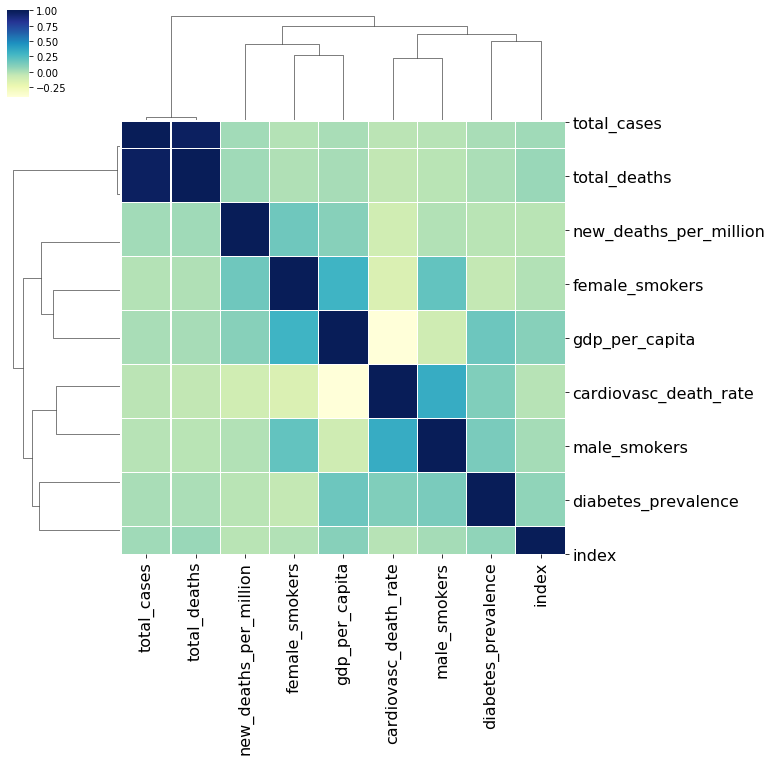

In [91]:
import matplotlib.pyplot as plt
map_corr= sns.clustermap(analyse_data_cardio.corr(), cmap ="YlGnBu", linewidths = 0.1)
plt.setp(map_corr.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
map_corr.ax_heatmap.set_xticklabels(map_corr.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
map_corr.ax_heatmap.set_yticklabels(map_corr.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

map_corr
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')